In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 3A9E-1863

 Directory of C:\Users\Acer\Desktop\Neural

10-02-2023  13:18    <DIR>          .
10-02-2023  13:18    <DIR>          ..
10-02-2023  13:18    <DIR>          .ipynb_checkpoints
08-02-2023  02:11        15,723,363 Neural networks .ipynb
30-01-2023  00:42           245,552 PCA.ipynb
29-01-2023  21:03               368 PCA_problem Statement.txt
30-01-2023  00:42            98,943 Untitled.ipynb
29-01-2023  21:03            11,425 wine.csv
               5 File(s)     16,079,651 bytes
               3 Dir(s)  38,668,025,856 bytes free


In [3]:
wine_data=pd.read_csv("wine.csv")

In [4]:
wine_data1=wine_data.drop(['Type'],axis=1)
wine_data1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Data Exploration

In [7]:
wine_data1.isnull().any()

Alcohol            False
Malic              False
Ash                False
Alcalinity         False
Magnesium          False
Phenols            False
Flavanoids         False
Nonflavanoids      False
Proanthocyanins    False
Color              False
Hue                False
Dilution           False
Proline            False
dtype: bool

In [9]:
wine_data1.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

No missing data so all the entries are valid

# Descriptive Analysis

In [10]:
wine_data1.shape

(178, 13)

In [11]:
#Checking the data types
wine_data1.dtypes

Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [12]:
#Unique values for every feature
wine_data1.nunique()

Alcohol            126
Malic              133
Ash                 79
Alcalinity          63
Magnesium           53
Phenols             97
Flavanoids         132
Nonflavanoids       39
Proanthocyanins    101
Color              132
Hue                 78
Dilution           122
Proline            121
dtype: int64

In [13]:
wine_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [14]:
wine_data1[wine_data1.duplicated()]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [16]:
wine_data1[wine_data1.duplicated()].shape

(0, 13)

No duplicate values

In [19]:
wine_data1.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [22]:
wine_data1.corr()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


# Data Visualization

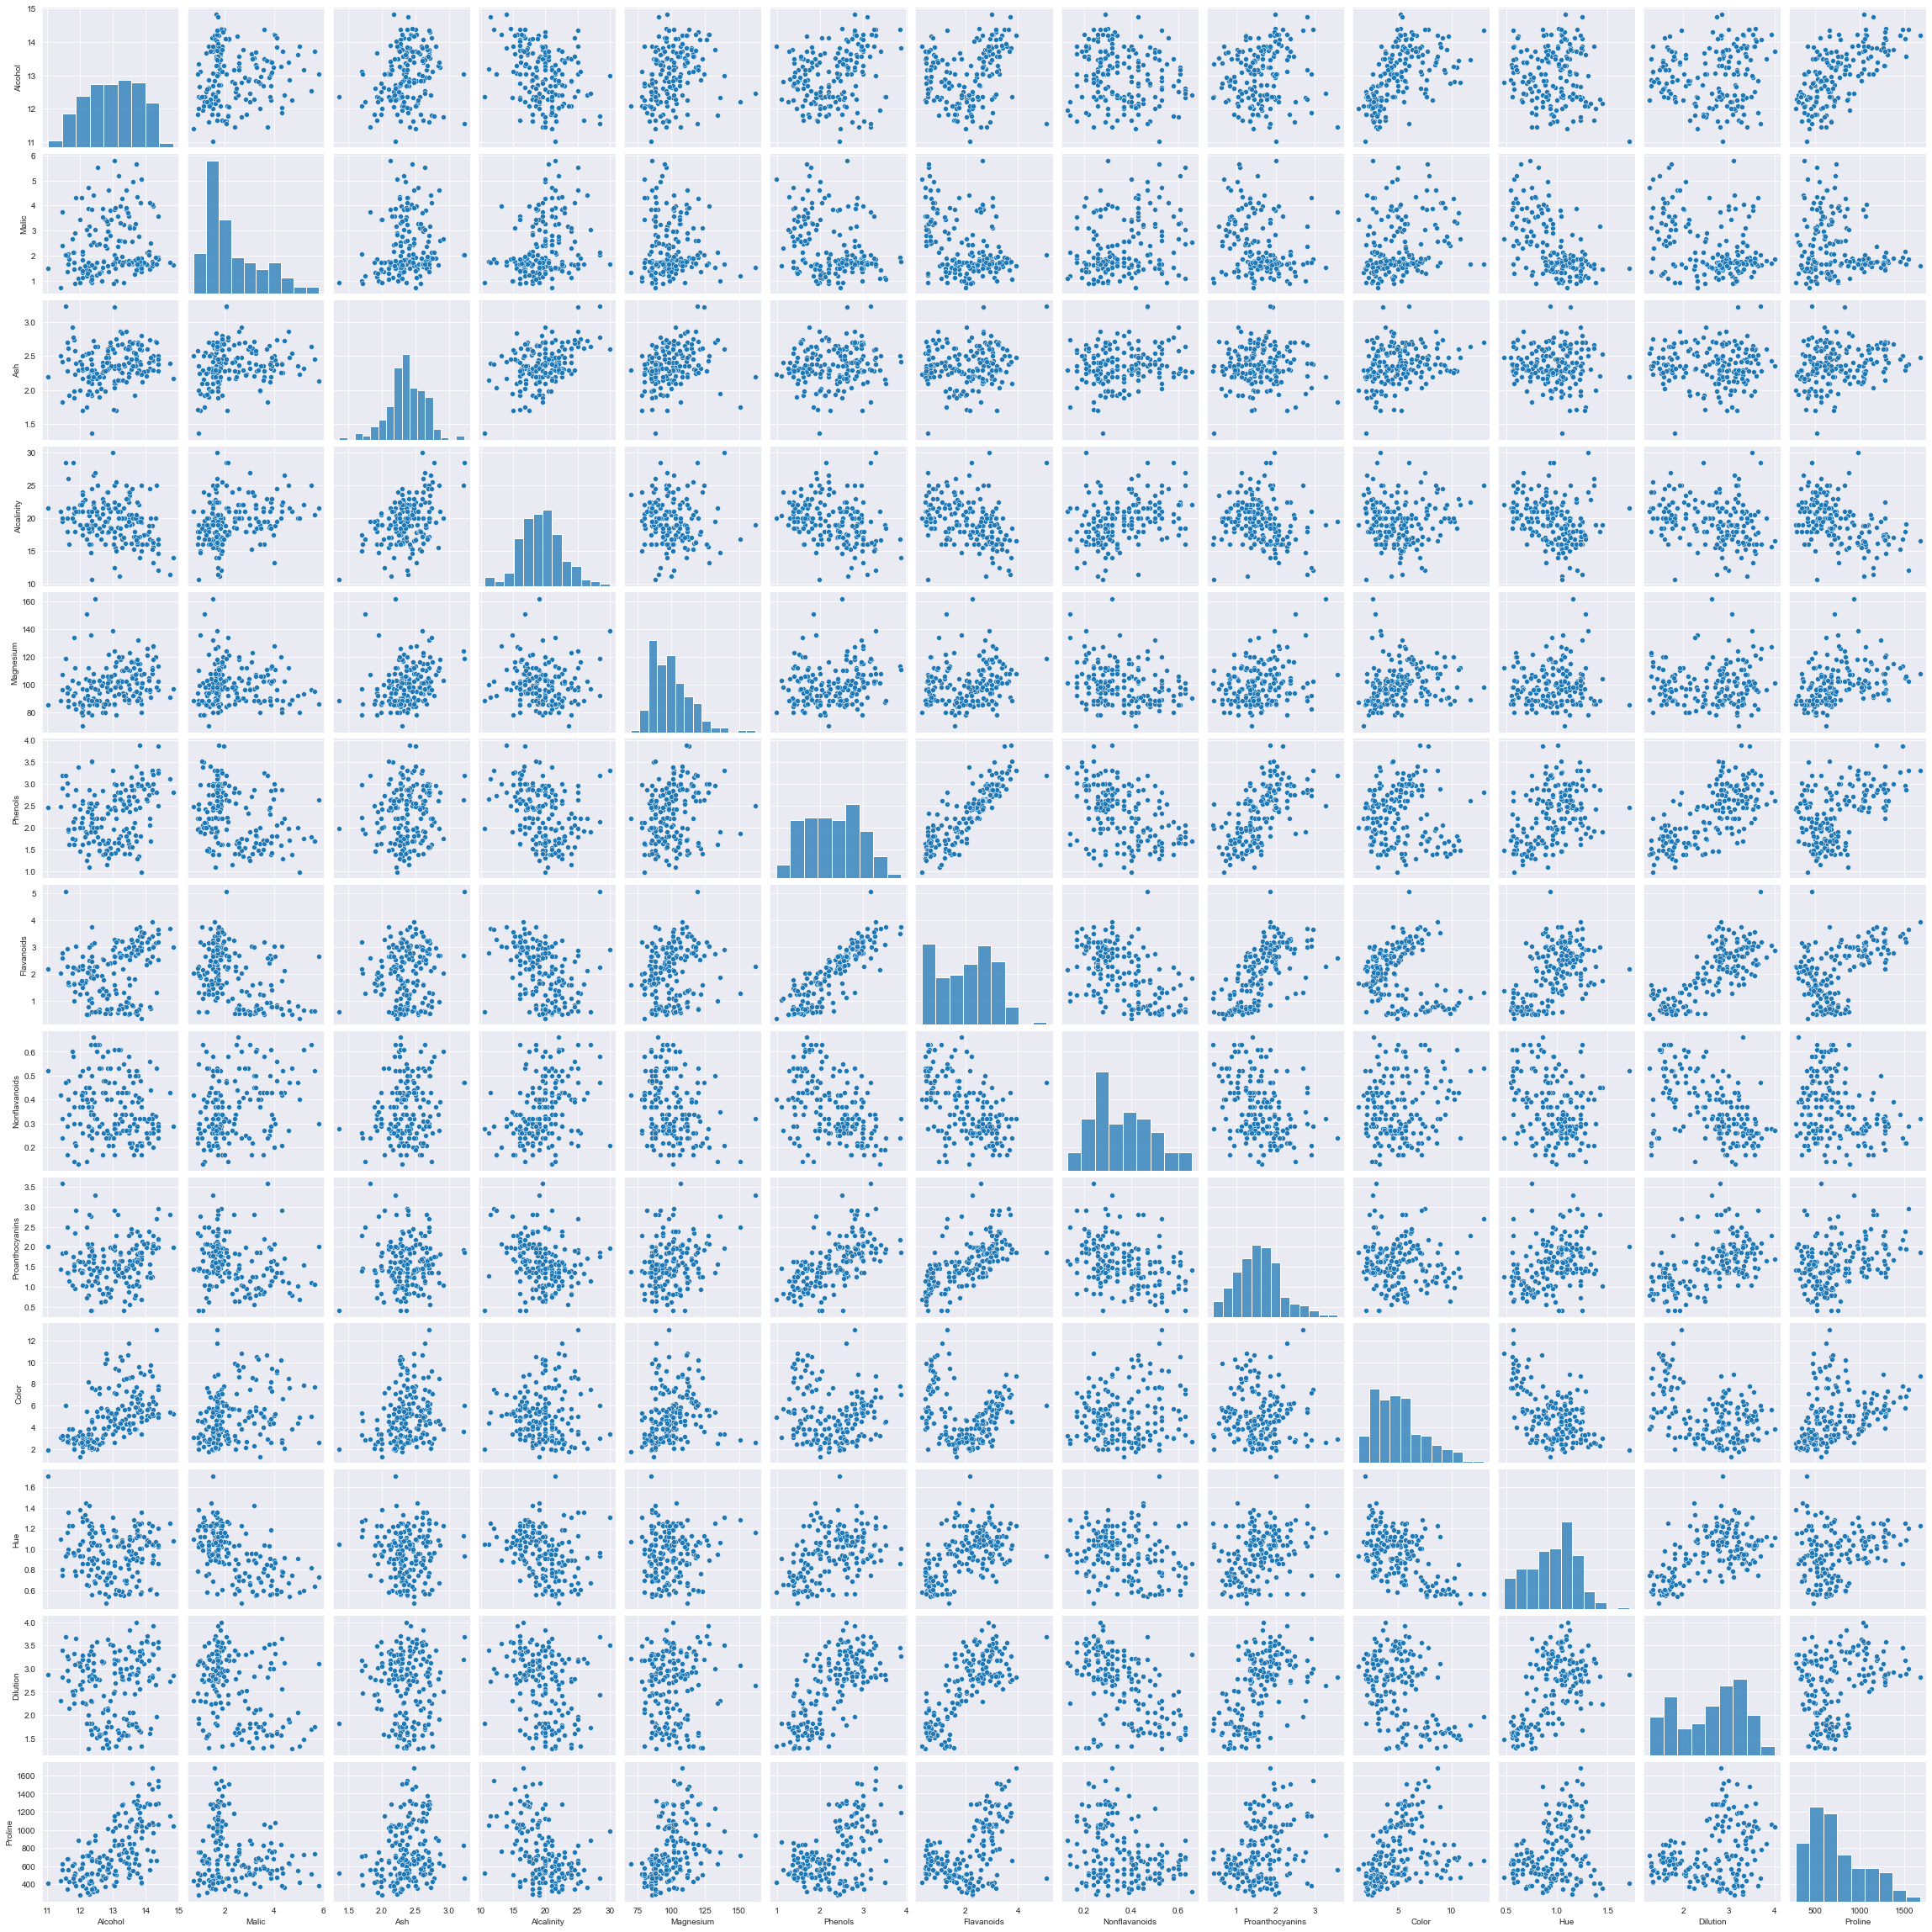

In [21]:
#Format the plot background and scatter plots for all the variables
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(wine_data1)

<AxesSubplot:>

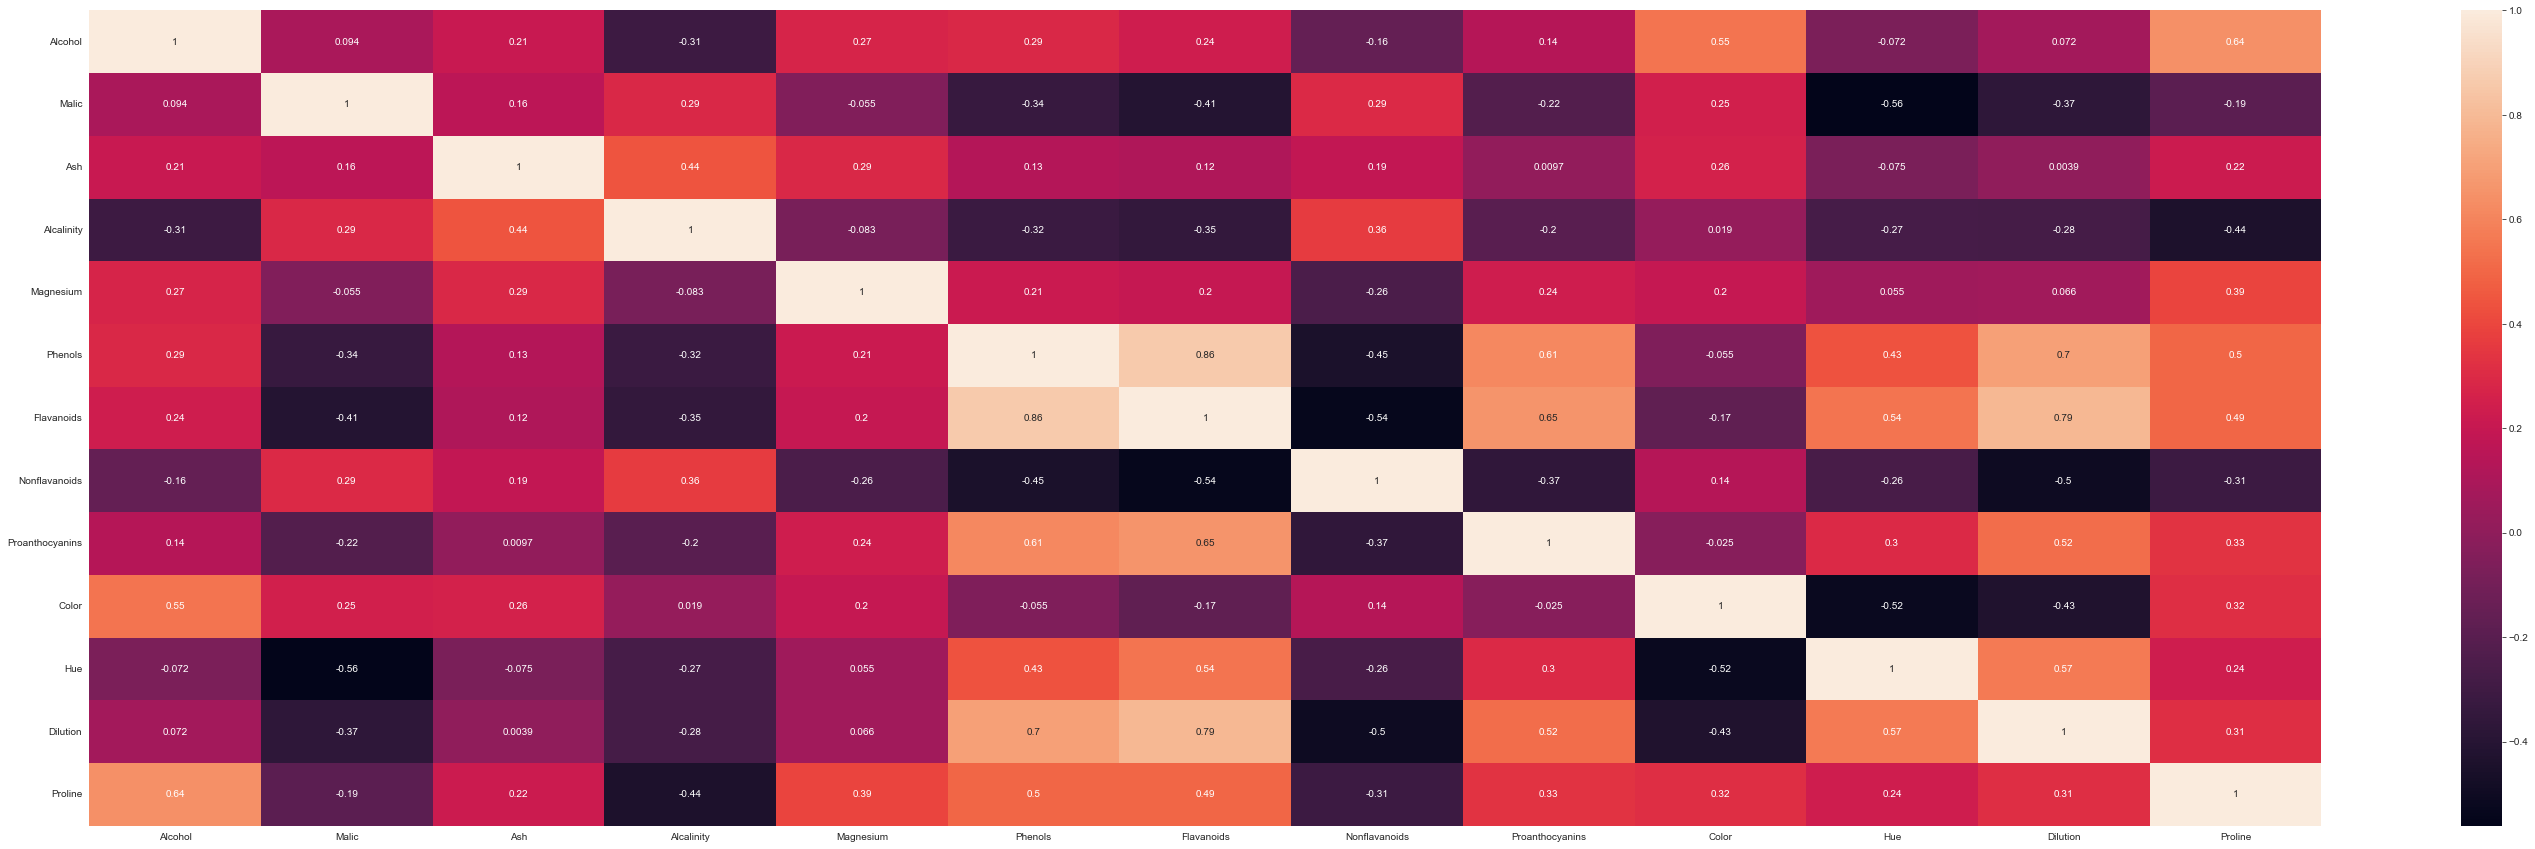

In [34]:
plt.figure(figsize=(50,15))
sns.heatmap(wine_data1.corr(),annot=True)

# Scaling the data

In [35]:
#normailising the data
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [36]:
wine_data2=norm_func(wine_data1.iloc[:,:])
wine_data2

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [37]:
x=wine_data2.iloc[:,:]

In [38]:
np.matmul(x.T,x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
Alcohol,55.947902,29.909731,50.857768,40.303934,31.430807,44.219691,34.784310,38.996475,35.320148,33.843331,35.327013,46.077068,36.339455
Malic,29.909731,26.343995,31.166198,27.688450,17.822951,22.639458,16.628659,27.254493,19.361941,20.027260,17.722070,23.851272,17.095830
Ash,50.857768,31.166198,55.377449,45.909835,32.127761,44.170256,34.774160,43.047523,35.735775,32.214524,36.829312,47.111947,33.346751
Alcalinity,40.303934,27.688450,45.909835,42.664975,25.989635,34.899111,26.829810,38.292064,29.317327,26.422007,30.128732,37.916563,24.279924
Magnesium,31.430807,17.822951,32.127761,25.989635,22.868384,27.366642,21.641373,23.519278,22.609347,19.636667,22.619548,28.751991,21.672936
Phenols,44.219691,22.639458,44.170256,34.899111,27.366642,44.849429,35.727077,31.276318,34.294104,25.604728,34.411836,46.624466,31.270476
Flavanoids,34.784310,16.628659,34.774160,26.829810,21.641373,35.727077,30.467994,23.039846,28.027233,19.177809,28.391270,38.812677,25.356441
Nonflavanoids,38.996475,27.254493,43.047523,38.292064,23.519278,31.276318,23.039846,43.823781,26.262187,26.244945,28.197484,32.829014,23.135669
Proanthocyanins,35.320148,19.361941,35.735775,29.317327,22.609347,34.294104,28.027233,26.262187,30.471912,21.215973,27.494422,36.902439,24.548635
Color,33.843331,20.027260,32.214524,26.422007,19.636667,25.604728,19.177809,26.244945,21.215973,25.422857,18.878383,24.295672,21.676527


In [39]:
np.matmul(x.T,x).shape

(13, 13)

In [40]:
np.linalg.eig(np.matmul(x.T,x))

(array([414.14031684,  33.98475835,  15.58201667,   7.3385978 ,
          5.32048043,   4.53532115,   3.52460626,   0.77930495,
          1.47101377,   1.24972187,   2.70663782,   2.18932587,
          2.15358959]),
 array([[-3.49331221e-01,  5.93471128e-02, -4.70938085e-01,
          7.42911510e-02,  2.78723498e-01, -1.52380991e-01,
          2.44007955e-01,  1.17293632e-02, -4.39219767e-01,
         -4.63268852e-02,  5.20759147e-01,  1.26135175e-01,
          6.63264100e-02],
        [-2.01022373e-01,  3.79436647e-01, -2.49845569e-02,
         -6.52666403e-01,  4.13245420e-01, -2.03149100e-01,
         -2.86914593e-01,  3.11222296e-02,  1.44681204e-01,
          3.28482651e-02, -1.10157761e-01,  4.60936782e-02,
         -2.39623133e-01],
        [-3.56012914e-01,  1.74857096e-01,  7.61651902e-02,
          1.81519904e-02, -2.89030725e-01, -1.90710900e-01,
          2.45457172e-01, -3.50619018e-01, -2.28218968e-01,
          6.08411255e-01, -3.26494712e-01, -1.72606510e-02,
         -

In [41]:
w,v=np.linalg.eig(np.matmul(x.T,x))

In [42]:
w

array([414.14031684,  33.98475835,  15.58201667,   7.3385978 ,
         5.32048043,   4.53532115,   3.52460626,   0.77930495,
         1.47101377,   1.24972187,   2.70663782,   2.18932587,
         2.15358959])

In [43]:
v

array([[-3.49331221e-01,  5.93471128e-02, -4.70938085e-01,
         7.42911510e-02,  2.78723498e-01, -1.52380991e-01,
         2.44007955e-01,  1.17293632e-02, -4.39219767e-01,
        -4.63268852e-02,  5.20759147e-01,  1.26135175e-01,
         6.63264100e-02],
       [-2.01022373e-01,  3.79436647e-01, -2.49845569e-02,
        -6.52666403e-01,  4.13245420e-01, -2.03149100e-01,
        -2.86914593e-01,  3.11222296e-02,  1.44681204e-01,
         3.28482651e-02, -1.10157761e-01,  4.60936782e-02,
        -2.39623133e-01],
       [-3.56012914e-01,  1.74857096e-01,  7.61651902e-02,
         1.81519904e-02, -2.89030725e-01, -1.90710900e-01,
         2.45457172e-01, -3.50619018e-01, -2.28218968e-01,
         6.08411255e-01, -3.26494712e-01, -1.72606510e-02,
        -6.56655460e-02],
       [-2.93223505e-01,  3.04819202e-01,  3.44672031e-01,
        -1.39242860e-01, -4.20076743e-01, -7.81159426e-02,
         3.12696680e-01,  2.15631506e-01, -5.62785041e-02,
        -4.92797292e-01,  1.41484570e

In [44]:
np.matmul(x,v)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.965754,-0.497453,-0.233561,-0.026089,0.026691,-0.074433,-0.065640,-0.007920,-0.014195,0.051533,0.091287,0.020998,0.304062
1,-1.478743,-0.488921,-0.184450,0.060043,0.240098,-0.100510,-0.003670,-0.006156,0.112486,0.063780,-0.101123,0.071526,0.104071
2,-1.911227,-0.322592,-0.105952,-0.087453,-0.046445,0.119833,-0.106892,-0.023345,-0.042628,0.100354,-0.108599,-0.219374,-0.055301
3,-2.106077,-0.520098,-0.532945,-0.072911,0.003523,0.120107,0.090347,-0.052826,-0.013816,-0.135976,-0.181345,0.025221,0.049909
4,-1.853606,-0.019308,0.115458,-0.047741,-0.107207,-0.068469,-0.027883,-0.033823,-0.106789,0.077772,-0.080802,0.132525,0.027625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-1.486692,0.888320,-0.243248,-0.229273,0.291643,-0.072341,-0.078999,-0.019119,0.035202,-0.005211,-0.037199,0.006420,-0.050568
174,-1.435216,0.682077,-0.198380,-0.105112,-0.050274,-0.025590,-0.047392,-0.032070,-0.034348,-0.066004,0.022644,-0.047643,-0.085188
175,-1.406310,0.738718,-0.431830,-0.139468,-0.072974,0.004863,-0.196149,0.039866,0.179248,-0.040775,0.002869,0.005707,0.067285
176,-1.411621,0.670539,-0.309485,0.160215,-0.150953,0.108994,-0.151333,0.011309,0.065107,-0.039180,-0.031821,-0.010727,0.192551


In [45]:
pd.DataFrame(np.matmul(x,v).values,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13'])

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13
0,-1.965754,-0.497453,-0.233561,-0.026089,0.026691,-0.074433,-0.065640,-0.007920,-0.014195,0.051533,0.091287,0.020998,0.304062
1,-1.478743,-0.488921,-0.184450,0.060043,0.240098,-0.100510,-0.003670,-0.006156,0.112486,0.063780,-0.101123,0.071526,0.104071
2,-1.911227,-0.322592,-0.105952,-0.087453,-0.046445,0.119833,-0.106892,-0.023345,-0.042628,0.100354,-0.108599,-0.219374,-0.055301
3,-2.106077,-0.520098,-0.532945,-0.072911,0.003523,0.120107,0.090347,-0.052826,-0.013816,-0.135976,-0.181345,0.025221,0.049909
4,-1.853606,-0.019308,0.115458,-0.047741,-0.107207,-0.068469,-0.027883,-0.033823,-0.106789,0.077772,-0.080802,0.132525,0.027625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-1.486692,0.888320,-0.243248,-0.229273,0.291643,-0.072341,-0.078999,-0.019119,0.035202,-0.005211,-0.037199,0.006420,-0.050568
174,-1.435216,0.682077,-0.198380,-0.105112,-0.050274,-0.025590,-0.047392,-0.032070,-0.034348,-0.066004,0.022644,-0.047643,-0.085188
175,-1.406310,0.738718,-0.431830,-0.139468,-0.072974,0.004863,-0.196149,0.039866,0.179248,-0.040775,0.002869,0.005707,0.067285
176,-1.411621,0.670539,-0.309485,0.160215,-0.150953,0.108994,-0.151333,0.011309,0.065107,-0.039180,-0.031821,-0.010727,0.192551


In [46]:
new_data=pd.DataFrame(np.matmul(x,v).values,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13'])

In [47]:
new_data

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13
0,-1.965754,-0.497453,-0.233561,-0.026089,0.026691,-0.074433,-0.065640,-0.007920,-0.014195,0.051533,0.091287,0.020998,0.304062
1,-1.478743,-0.488921,-0.184450,0.060043,0.240098,-0.100510,-0.003670,-0.006156,0.112486,0.063780,-0.101123,0.071526,0.104071
2,-1.911227,-0.322592,-0.105952,-0.087453,-0.046445,0.119833,-0.106892,-0.023345,-0.042628,0.100354,-0.108599,-0.219374,-0.055301
3,-2.106077,-0.520098,-0.532945,-0.072911,0.003523,0.120107,0.090347,-0.052826,-0.013816,-0.135976,-0.181345,0.025221,0.049909
4,-1.853606,-0.019308,0.115458,-0.047741,-0.107207,-0.068469,-0.027883,-0.033823,-0.106789,0.077772,-0.080802,0.132525,0.027625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-1.486692,0.888320,-0.243248,-0.229273,0.291643,-0.072341,-0.078999,-0.019119,0.035202,-0.005211,-0.037199,0.006420,-0.050568
174,-1.435216,0.682077,-0.198380,-0.105112,-0.050274,-0.025590,-0.047392,-0.032070,-0.034348,-0.066004,0.022644,-0.047643,-0.085188
175,-1.406310,0.738718,-0.431830,-0.139468,-0.072974,0.004863,-0.196149,0.039866,0.179248,-0.040775,0.002869,0.005707,0.067285
176,-1.411621,0.670539,-0.309485,0.160215,-0.150953,0.108994,-0.151333,0.011309,0.065107,-0.039180,-0.031821,-0.010727,0.192551


In [48]:
new_data00=new_data

In [49]:
np.round(w/sum(w),4)

array([0.8367, 0.0687, 0.0315, 0.0148, 0.0107, 0.0092, 0.0071, 0.0016,
       0.003 , 0.0025, 0.0055, 0.0044, 0.0044])

# Kmeans

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples,silhouette_score

In [51]:
# checking the optimim number of clusters.
nc=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=10)
    kmeans.fit(new_data)
    nc.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow graph')

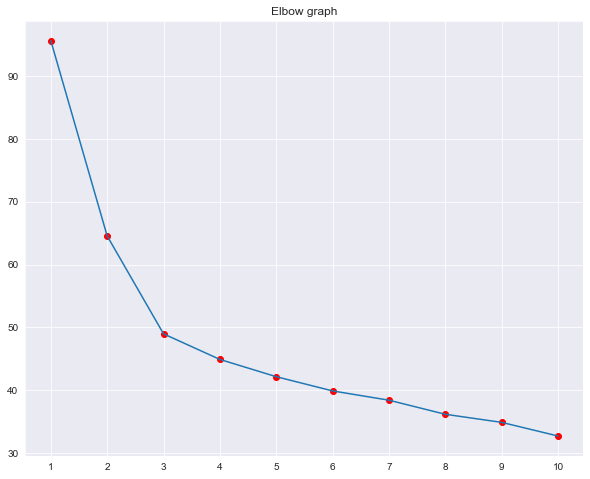

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(range(1,11),nc)
plt.scatter(range(1,11),nc,color='red')
plt.xticks(range(1,11))
plt.title('Elbow graph') # Its clear that by observing the elbow graph, the optimum number of clusters are 3.

In [53]:
# The optimum number of clusters are 3 and the given number of clusters are correct with the original data 


In [54]:
#Extracting first 3 principal component scores  as given.
x=new_data.iloc[:,0:3]

In [56]:
x

,pc1,pc2,pc3
0,-1.965754,-0.497453,-0.233561
1,-1.478743,-0.488921,-0.184450
2,-1.911227,-0.322592,-0.105952
3,-2.106077,-0.520098,-0.532945
4,-1.853606,-0.019308,0.115458
...,...,...,...
173,-1.486692,0.888320,-0.243248
174,-1.435216,0.682077,-0.198380
175,-1.406310,0.738718,-0.431830
176,-1.411621,0.670539,-0.309485


In [57]:
clustered=KMeans(n_clusters=3,init='k-means++',random_state=10)
clustered.fit(x)

KMeans(n_clusters=3, random_state=10)

In [58]:
clustered.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [59]:
wine_data0=x

In [60]:
wine_data0['cluster_id']=clustered.labels_

In [61]:
wine_data0

,pc1,pc2,pc3,cluster_id
0,-1.965754,-0.497453,-0.233561,0
1,-1.478743,-0.488921,-0.184450,0
2,-1.911227,-0.322592,-0.105952,0
3,-2.106077,-0.520098,-0.532945,0
4,-1.853606,-0.019308,0.115458,0
...,...,...,...,...
173,-1.486692,0.888320,-0.243248,1
174,-1.435216,0.682077,-0.198380,1
175,-1.406310,0.738718,-0.431830,1
176,-1.411621,0.670539,-0.309485,1


In [62]:
wine_data0.groupby(['cluster_id']).agg(['mean']).reset_index()

,cluster_id,pc1,pc2,pc3
,,mean,mean,mean
0,0,-1.788492,-0.339576,-0.172274
1,1,-1.309571,0.625897,-0.122331
2,2,-1.346708,-0.051944,0.343781


In [63]:
for i in np.array([0,1,2]):
    print('cluster index',i)
    print(wine_data0[wine_data0['cluster_id']==i])
    print('\n')

cluster index 0
         pc1       pc2       pc3  cluster_id
0  -1.965754 -0.497453 -0.233561           0
1  -1.478743 -0.488921 -0.184450           0
2  -1.911227 -0.322592 -0.105952           0
3  -2.106077 -0.520098 -0.532945           0
4  -1.853606 -0.019308  0.115458           0
..       ...       ...       ...         ...
71 -1.774121 -0.311120  0.288291           0
73 -2.060469 -0.381039  0.250966           0
74 -1.431853 -0.510514  0.132848           0
95 -1.702377 -0.313891  0.065736           0
98 -1.494965 -0.513416  0.120926           0

[65 rows x 4 columns]


cluster index 1
          pc1       pc2       pc3  cluster_id
61  -1.109288  0.351473  0.052634           1
70  -1.082889  0.244975  0.055468           1
83  -1.461282  0.640390  0.207747           1
118 -1.001902  0.367825  0.086173           1
130 -0.968971  0.185287 -0.224078           1
131 -1.040492  0.423063 -0.163107           1
132 -1.032428  0.508714 -0.101019           1
133 -1.069188  0.377472 -0.172414  

In [64]:
wine_data0

,pc1,pc2,pc3,cluster_id
0,-1.965754,-0.497453,-0.233561,0
1,-1.478743,-0.488921,-0.184450,0
2,-1.911227,-0.322592,-0.105952,0
3,-2.106077,-0.520098,-0.532945,0
4,-1.853606,-0.019308,0.115458,0
...,...,...,...,...
173,-1.486692,0.888320,-0.243248,1
174,-1.435216,0.682077,-0.198380,1
175,-1.406310,0.738718,-0.431830,1
176,-1.411621,0.670539,-0.309485,1


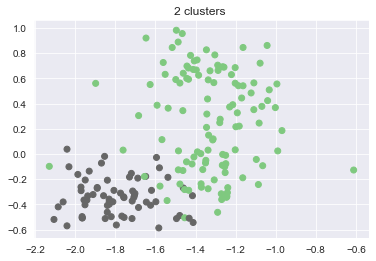

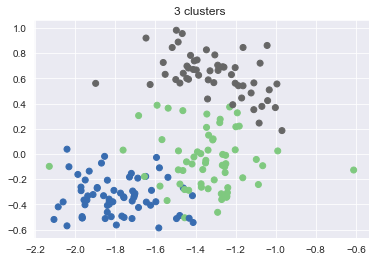

In [65]:
for i in range(2,4):
    model = KMeans(n_clusters=i, max_iter=600, algorithm = 'auto',init="k-means++",)
    model.fit(wine_data0)    
    pred=model.predict(wine_data0)    
    plt.scatter(wine_data0.iloc[:,0],wine_data0.iloc[:,1],c=pred,cmap=plt.cm.Accent)
    plt.title(str(i)+ " clusters ")
    plt.show()



# Hierarchical Clustering

In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [67]:
??pdist

In [68]:
xdistance=pdist(wine_data0,metric="euclidean")

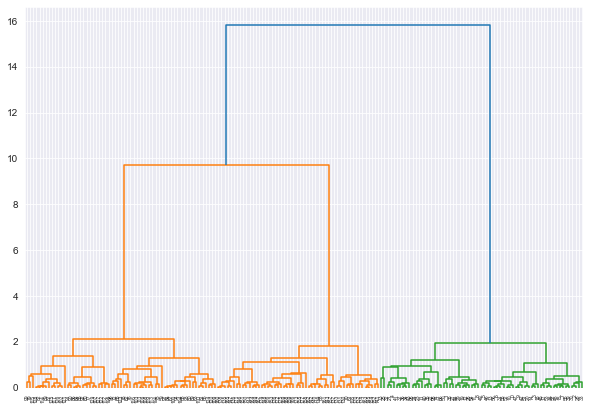

In [69]:
linked = linkage(xdistance, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [70]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="l1", linkage='complete')
pred=cluster.fit_predict(wine_data0)

In [74]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

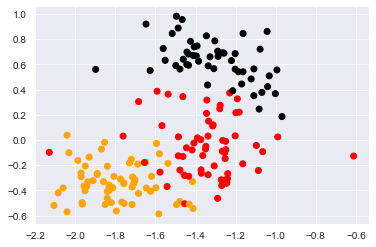

In [85]:
color=[]
for i in pred:
    if i==0:
        color.append('red')
    elif i==1:
        color.append('orange')
    elif i==2:
        color.append('black')
plt.scatter(wine_data0.iloc[:,0],wine_data0.iloc[:,1],c=color)